In [1]:
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM, Dense, Flatten, BatchNormalization, Dropout, GRU
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import module
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [2]:
countriesOfInterest = {"HK", "JP", 'ZA', 'TN', 'TR', 'GB', 'MX', 'US', 'CO', 'EC', 'AU', 'NZ'}
countriesOfInterest = ["ZA", "EG", "TW", "JP", "DK", "FI", "US", "CA", "AU", "NZ", "BR", "CO"]
#countriesOfInterest = list(countriesOfInterest & {"ZA", "EG", "TW", "JP", "DK", "FI", "US", "CA", "AU", "NZ", "BR", "CO"})

enc = OneHotEncoder()
enc.fit(np.array(countriesOfInterest).reshape(-1, 1))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [3]:
seconds = 5
samplerate = 100
train_x, train_labels, val_x, val_labels, class_weights = module.getSamples(1, 1, 1, seconds, samplerate, countriesOfInterest,
               enc, verbose = 0)

### Fit model

In [4]:
model = keras.Sequential()
model.add(LSTM(64, 
               input_shape=(train_x.shape[1], train_x.shape[2]), 
               return_sequences = True,
          #     recurrent_dropout = .5,
          #     kernel_regularizer=regularizers.l2(0.01),
              ))
model.add(BatchNormalization())
model.add(LSTM(128, 
             #  input_shape=(train_x.shape[1], train_x.shape[2]), 
               return_sequences = False,
               recurrent_dropout = .5,
               go_backwards = True
          #     kernel_regularizer=regularizers.l2(0.01),
              ))
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(256, activation= "relu"))
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(len(enc.categories_[0]), activation= "softmax"))
adam = keras.optimizers.Adam(lr=0.001)
model.compile(loss = "categorical_crossentropy", optimizer= adam, metrics=["acc"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 500, 64)           23040     
_________________________________________________________________
batch_normalization (BatchNo (None, 500, 64)           256       
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               98816     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               33024     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1

train [9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000.]
val [2640. 3244. 2677. 3297. 3246. 3715. 3110. 3315. 3571. 3486. 3155. 4613.]
Train on 108000 samples, validate on 40069 samples
Epoch 1/3
108000/108000 [==============================] - 1498s 14ms/sample - loss: 2.7982 - acc: 0.0964 - val_loss: 2.4817 - val_acc: 0.0969
Epoch 2/3
108000/108000 [==============================] - 1518s 14ms/sample - loss: 2.4986 - acc: 0.1065 - val_loss: 2.4797 - val_acc: 0.1020
Epoch 3/3
40069/40069 [==============================] - 66s 2ms/sample


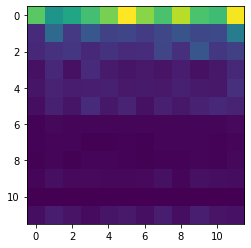

108000/108000 [==============================] - 190s 2ms/sample


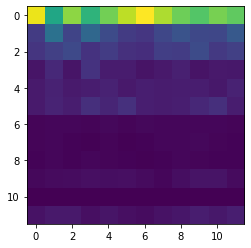

train [9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000.]
val [2624. 2716. 2820. 3018. 2771. 4288. 3093. 3613. 3415. 3727. 3200. 4203.]
Train on 108000 samples, validate on 39488 samples
Epoch 4/6
108000/108000 [==============================] - 1705s 16ms/sample - loss: 2.4717 - acc: 0.1188 - val_loss: 2.4713 - val_acc: 0.1107
Epoch 5/6
108000/108000 [==============================] - 1822s 17ms/sample - loss: 2.4589 - acc: 0.1248 - val_loss: 2.4666 - val_acc: 0.1049
Epoch 6/6
39488/39488 [==============================] - 69s 2ms/sample


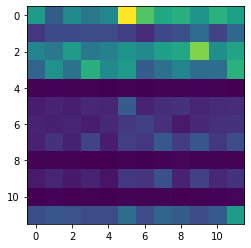

108000/108000 [==============================] - 190s 2ms/sample


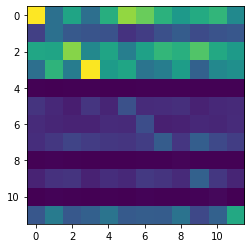

train [9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000.]
val [3748. 2506. 2815. 3471. 3128. 4157. 3234. 3721. 3983. 3510. 2962. 4367.]
Train on 108000 samples, validate on 41602 samples
Epoch 7/9
108000/108000 [==============================] - 2354s 22ms/sample - loss: 2.4607 - acc: 0.1242 - val_loss: 2.4664 - val_acc: 0.1136
Epoch 8/9
108000/108000 [==============================] - 1693s 16ms/sample - loss: 2.4537 - acc: 0.1289 - val_loss: 2.4596 - val_acc: 0.1262
Epoch 9/9
41602/41602 [==============================] - 72s 2ms/sample


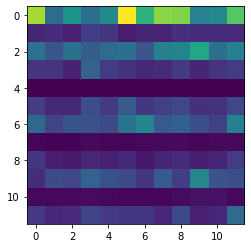

108000/108000 [==============================] - 196s 2ms/sample


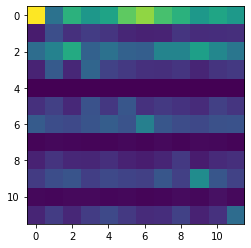

train [9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000.]
val [2852. 3245. 2588. 3343. 3208. 2949. 2570. 3666. 3169. 3760. 3113. 3898.]
Train on 108000 samples, validate on 38361 samples
Epoch 10/12
108000/108000 [==============================] - 2166s 20ms/sample - loss: 2.4547 - acc: 0.1272 - val_loss: 2.4543 - val_acc: 0.1230
Epoch 11/12
108000/108000 [==============================] - 2591s 24ms/sample - loss: 2.4476 - acc: 0.1325 - val_loss: 2.4451 - val_acc: 0.1320
Epoch 12/12
38361/38361 [==============================] - 69s 2ms/sample


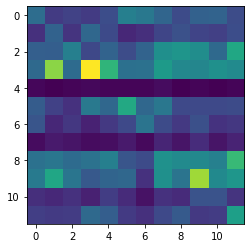

108000/108000 [==============================] - 196s 2ms/sample


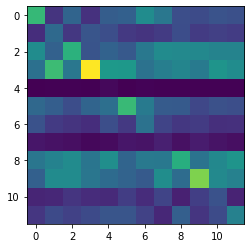

train [9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000.]
val [2812. 3152. 2854. 3031. 2907. 3531. 3091. 4079. 2842. 3423. 2962. 3772.]
Train on 108000 samples, validate on 38456 samples
Epoch 13/15
108000/108000 [==============================] - 2654s 25ms/sample - loss: 2.4527 - acc: 0.1289 - val_loss: 2.4460 - val_acc: 0.1379
Epoch 14/15
108000/108000 [==============================] - 2548s 24ms/sample - loss: 2.4461 - acc: 0.1322 - val_loss: 2.4437 - val_acc: 0.1395
Epoch 15/15
38456/38456 [==============================] - 70s 2ms/sample


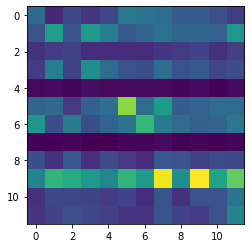

108000/108000 [==============================] - 212s 2ms/sample


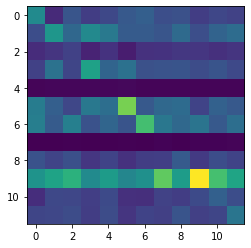

train [9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000.]
val [2926. 3280. 2733. 3533. 2808. 3417. 2811. 4616. 3144. 3552. 2804. 3583.]
Train on 108000 samples, validate on 39207 samples
Epoch 16/18
108000/108000 [==============================] - 2454s 23ms/sample - loss: 2.4400 - acc: 0.1406 - val_loss: 2.4614 - val_acc: 0.1327
Epoch 17/18
108000/108000 [==============================] - 2412s 22ms/sample - loss: 2.4331 - acc: 0.1440 - val_loss: 2.4601 - val_acc: 0.1325
Epoch 18/18
39207/39207 [==============================] - 75s 2ms/sample


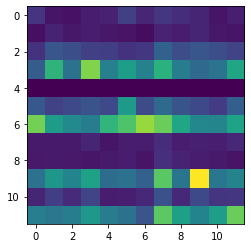

108000/108000 [==============================] - 210s 2ms/sample


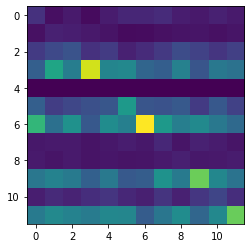

train [9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000.]
val [2920. 3061. 2670. 3395. 2751. 3234. 3272. 3341. 3401. 3580. 3409. 3182.]
Train on 108000 samples, validate on 38216 samples
Epoch 19/21
108000/108000 [==============================] - 1925s 18ms/sample - loss: 2.4467 - acc: 0.1342 - val_loss: 2.4596 - val_acc: 0.1309
Epoch 20/21
108000/108000 [==============================] - 1719s 16ms/sample - loss: 2.4407 - acc: 0.1392 - val_loss: 2.4544 - val_acc: 0.1358
Epoch 21/21
38216/38216 [==============================] - 70s 2ms/sample


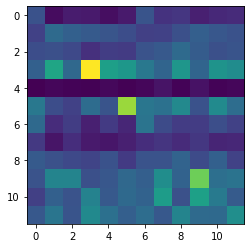

108000/108000 [==============================] - 203s 2ms/sample


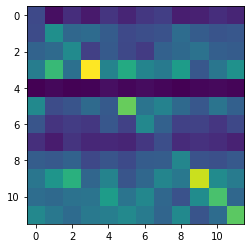

train [9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000.]
val [2643. 3111. 2792. 2801. 2802. 3946. 2624. 3264. 3078. 4015. 2508. 4620.]
Train on 108000 samples, validate on 38204 samples
Epoch 22/24
108000/108000 [==============================] - 2023s 19ms/sample - loss: 2.4482 - acc: 0.1333 - val_loss: 2.4309 - val_acc: 0.1438
Epoch 23/24
108000/108000 [==============================] - 1856s 17ms/sample - loss: 2.4413 - acc: 0.1366 - val_loss: 2.4318 - val_acc: 0.1429
Epoch 24/24
38204/38204 [==============================] - 71s 2ms/sample


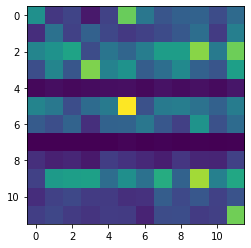

108000/108000 [==============================] - 210s 2ms/sample


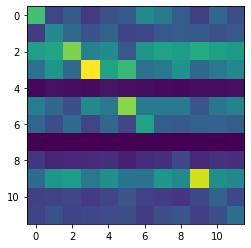

train [9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000.]
val [2850. 3350. 2918. 3347. 2696. 3522. 2987. 3727. 3013. 2966. 3324. 4205.]
Train on 108000 samples, validate on 38905 samples
Epoch 25/27
108000/108000 [==============================] - 2541s 24ms/sample - loss: 2.4459 - acc: 0.1340 - val_loss: 2.4292 - val_acc: 0.1470
Epoch 26/27
108000/108000 [==============================] - 2721s 25ms/sample - loss: 2.4405 - acc: 0.1368 - val_loss: 2.4288 - val_acc: 0.1463
Epoch 27/27
38905/38905 [==============================] - 75s 2ms/sample


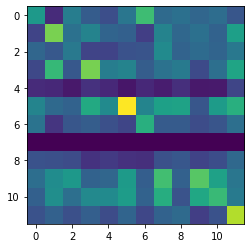

108000/108000 [==============================] - 205s 2ms/sample


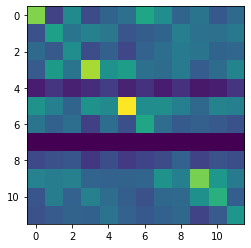

train [9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000.]
val [2796. 3387. 2977. 3626. 2660. 3301. 3713. 3394. 3207. 3732. 3321. 4319.]
Train on 108000 samples, validate on 40433 samples
Epoch 28/30
108000/108000 [==============================] - 2299s 21ms/sample - loss: 2.4469 - acc: 0.1340 - val_loss: 2.4309 - val_acc: 0.1567
Epoch 29/30
108000/108000 [==============================] - 1891s 18ms/sample - loss: 2.4401 - acc: 0.1382 - val_loss: 2.4323 - val_acc: 0.1556
Epoch 30/30
40433/40433 [==============================] - 75s 2ms/sample


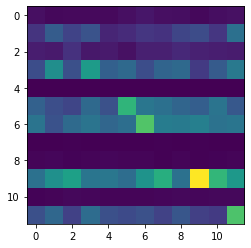

108000/108000 [==============================] - 208s 2ms/sample


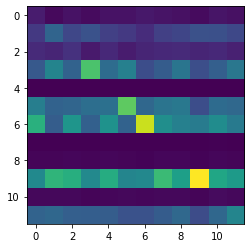

train [9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000.]
val [2953. 3032. 2947. 3453. 2738. 3661. 3418. 3258. 2864. 3468. 2873. 3978.]
Train on 108000 samples, validate on 38643 samples
Epoch 31/33
108000/108000 [==============================] - 2343s 22ms/sample - loss: 2.4467 - acc: 0.1329 - val_loss: 2.4212 - val_acc: 0.1554
Epoch 32/33
108000/108000 [==============================] - 2223s 21ms/sample - loss: 2.4424 - acc: 0.1346 - val_loss: 2.4245 - val_acc: 0.1502
Epoch 33/33
38643/38643 [==============================] - 75s 2ms/sample


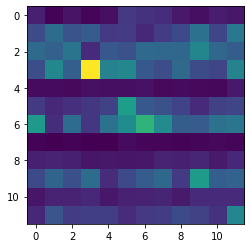

108000/108000 [==============================] - 211s 2ms/sample


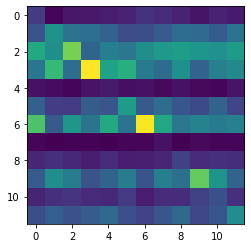

train [9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000. 9000.]
val [2991. 3596. 2735. 2690. 2904. 3792. 2905. 4594. 3064. 3302. 2871. 4166.]
Train on 108000 samples, validate on 39610 samples
Epoch 34/36
108000/108000 [==============================] - 2384s 22ms/sample - loss: 2.4454 - acc: 0.1362 - val_loss: 2.4475 - val_acc: 0.1327
Epoch 35/36
108000/108000 [==============================] - 2331s 22ms/sample - loss: 2.4410 - acc: 0.1363


KeyboardInterrupt: 

In [5]:
#add recurrent dropout to add noise to duration
desc = "LSTM64_128recDrop_DropD256Drop_Out_3Step_01LR_2H_forced"
log_dir = os.path.join(
    "logs",
    "Overfit",
    desc
)
model_dir = os.path.join(
    "pickle",
    "save"
)

train_n = 120
sample_n = 9000
val_n  = int(2*train_n/5)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
epochs = 3
iterations = 20
learn_rate = 0.01
batch_size = 5096
module.train(iterations, learn_rate, train_n, sample_n, val_n, seconds, samplerate,
                countriesOfInterest, enc, epochs, tensorboard_callback, model_dir,
                model, batch_size)